In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_diabetes
data=load_diabetes()
x=data.data
y=data.target

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)


In [ ]:
print("R2 Score :",r2_score(y_test,y_pred))
print("MSE :",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score : 0.4399338661568968
MSE : 55.627840795469155


In [ ]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=0.0001)
r.fit(x_train,y_train)

Ridge(alpha=0.0001)

In [ ]:
y_pred1=r.predict(x_test)
print("R2 Score :",r2_score(y_test,y_pred1))
print("MSE :",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 Score : 0.4400429511552675
MSE : 55.62242316881659


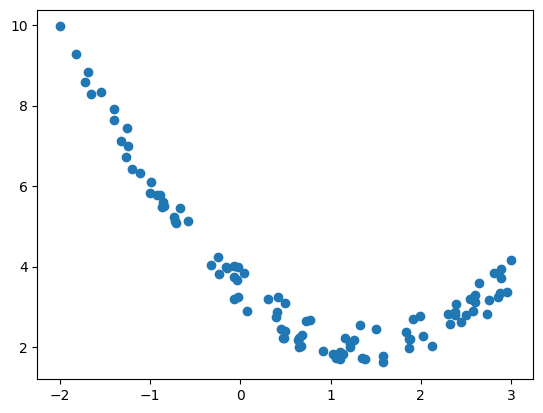

In [ ]:
m=100
x1=5* np.random.rand(m,1)-2
x2=0.7* x1**2 - 2*x1 + 3 +np.random.rand(m,1)
plt.scatter(x1,x2)
plt.show()

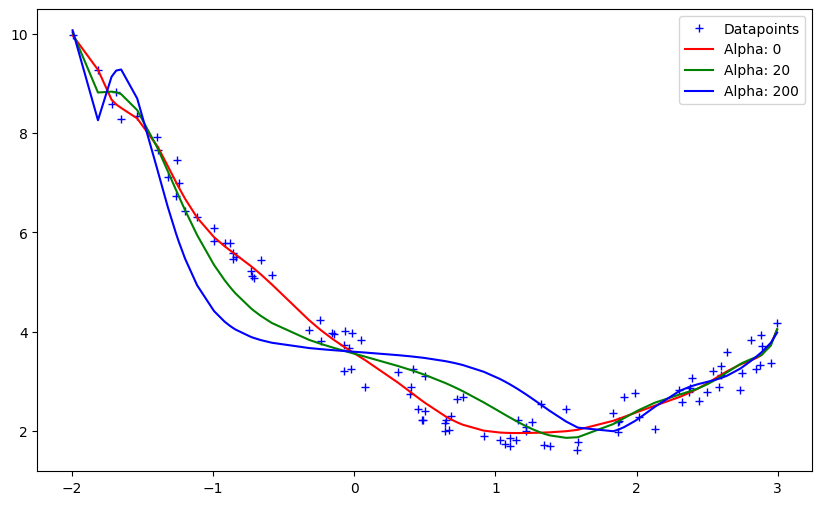

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()